<h3> [MUCURI] Previsão de horas a frente </h3>

Importando o tensorflow, o keras e as bibliotecas que serão usadas

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from tabulate import tabulate as tb
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Activation
from tensorflow.python.keras.optimizers import adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

import ai_utils.metrics as ai
import sklearn as sk

Lendo o dataset e tratando os valores nulos 

In [21]:
Mucuri = pd.read_csv('./train150_mucuri.txt', sep='\t', header = None)
Mucuri_prev = pd.read_csv('./prev150_mucuri.txt', sep='\t', header = None)
Mucuri.update(Mucuri[6].fillna(Mucuri[6].mean()))
Mucuri.describe()

,0,1,2,3,4,5,6,7,8
count,550.000000,550.000000,550.0,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,12.087273,11.981818,2015.0,11.496364,8.176719,73.027647,24.443445,85.263578,1017.313986
std,6.891273,0.133730,0.0,6.940745,2.724988,64.996263,1.668117,8.579562,8.796185
min,1.000000,11.000000,2015.0,0.000000,1.211905,1.448179,20.616279,46.355556,937.534333
25%,6.000000,12.000000,2015.0,5.250000,6.215278,38.605367,23.315657,80.942222,1016.544542
50%,12.000000,12.000000,2015.0,11.000000,8.320000,59.019307,24.338280,86.765805,1020.046750
75%,18.000000,12.000000,2015.0,17.750000,10.146806,83.329498,25.359083,91.434531,1021.497917
max,30.000000,12.000000,2015.0,23.000000,13.572222,356.553715,30.140625,98.000000,1023.726500


Transformando o dataset em um numpy array e separando a coluna da velocidade do vento

In [22]:
x_array = Mucuri.values 
y_array = Mucuri[4].values

#x_array = x_array[0:193, 0:9]
#y_array = y_array[1:194]

Criando o modelo da rede

In [23]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
  ])

  model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'])
  return model

In [24]:
scx = MinMaxScaler(feature_range=(-1, 1), copy=True)
x_array_norm = scx.fit_transform(x_array)

scy = MinMaxScaler(feature_range=(-1, 1), copy=True)
y_array = y_array.reshape(-1,1)
y_array_norm = scy.fit_transform(y_array)

Treinando a rede usando o EarlyStopping

In [25]:
model = get_compiled_model()
es = [EarlyStopping(monitor='val_loss', verbose=1, patience=5)]
history = model.fit(x_array_norm, y_array_norm, epochs=500, validation_split=0.2, callbacks = es)

Train on 440 samples, validate on 110 samples
Epoch 1/500
440/440 [==============================] - 0s 288us/sample - loss: 0.5958 - mean_absolute_error: 0.6570 - val_loss: 0.3645 - val_mean_absolute_error: 0.5101
Epoch 2/500
440/440 [==============================] - 0s 59us/sample - loss: 0.4414 - mean_absolute_error: 0.5569 - val_loss: 0.2741 - val_mean_absolute_error: 0.4332
Epoch 3/500
440/440 [==============================] - 0s 57us/sample - loss: 0.3299 - mean_absolute_error: 0.4722 - val_loss: 0.2368 - val_mean_absolute_error: 0.4005
Epoch 4/500
440/440 [==============================] - 0s 52us/sample - loss: 0.2589 - mean_absolute_error: 0.4131 - val_loss: 0.2276 - val_mean_absolute_error: 0.3941
Epoch 5/500
440/440 [==============================] - 0s 66us/sample - loss: 0.2244 - mean_absolute_error: 0.3828 - val_loss: 0.2233 - val_mean_absolute_error: 0.3909
Epoch 6/500
440/440 [==============================] - 0s 84us/sample - loss: 0.2087 - mean_absolute_error: 0.369

Gráfico de evolução do loss de treinamento e validação ao longo das épocas 

[0.595755293152549, 0.4414163898337971, 0.3299008949236436, 0.2588911246169697, 0.22443890219384974, 0.20865338851105084, 0.19938559884374793, 0.19178044877269051, 0.18618329546668314, 0.18118669363585385, 0.17651038278232922, 0.1713602215051651, 0.16473595174876127, 0.1551647037267685, 0.14177851568568836, 0.12956640002402392, 0.11883118152618408, 0.11044741719961167, 0.10319374691356312, 0.09678681912747296, 0.09096757187084718, 0.08542637852105227, 0.08061463927680795, 0.07579404881054705, 0.07131301435557279, 0.06751763522624969, 0.06419686783443798, 0.061077234081246635, 0.058185156908902254, 0.05553628389130939, 0.0530301224778999, 0.050589150054888295, 0.04845281094312668, 0.046375286917794835, 0.04442891417579217, 0.04258987756276673, 0.040891073915091426, 0.03936427716504444, 0.03784103095531464, 0.036413788050413134, 0.03515326448462226, 0.033883208239620384, 0.03265658224170858, 0.031576086750084706, 0.03048545951870355, 0.02949240268631415, 0.028588169237429444, 0.027623513

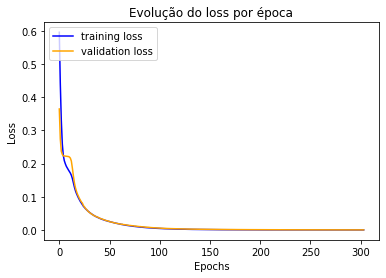

In [26]:
print(history.history['loss'])
plt.plot(history.history['loss'], color = 'blue', label='training loss')
plt.plot(history.history['val_loss'], color = 'orange', label='validation loss') 
plt.legend(loc='upper left')
plt.title('Evolução do loss por época')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [27]:
lossEvaluate, acc = model.evaluate(x_array_norm, y_array_norm)

550/550 [==============================] - 0s 40us/sample - loss: 5.0643e-05 - mean_absolute_error: 0.0025


Previsão e comparação gráfica entre o previsto e o observado para o dataset de treinamento

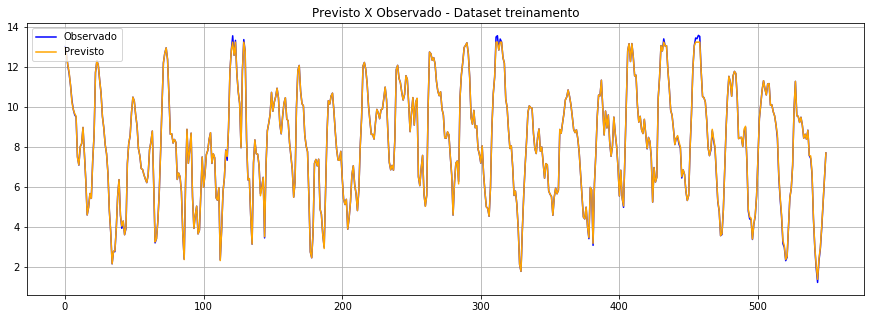

In [28]:
vel = model.predict(x_array_norm)

vel = scy.inverse_transform(vel)
y_array = scy.inverse_transform(y_array_norm)

plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(y_array, color='blue', label='Observado') 
plt.plot(vel, color='orange', label='Previsto')
#plt.plot(y_array, color='blue', label='Observado') 
plt.legend(loc='upper left')
plt.title('Previsto X Observado - Dataset treinamento')
plt.show()

Métricas para avaliação: R, R2, Fac2, MSE e MAE para o dataset de treinamento

In [29]:
mae = sk.metrics.mean_absolute_error(y_array, vel)
mse = sk.metrics.mean_squared_error(y_array, vel)
R2 = sk.metrics.r2_score(y_array, vel)

#predconvert = tf.convert_to_tensor(vel)
#realconvert = tf.convert_to_tensor(y_array)
#R = ai.pearson_r(realconvert, predconvert, to_numpy=True)
#Fac2 = ai.fac2(realconvert, predconvert, to_numpy=True)

print(tb([['MAE: ', mae], ['MSE: ', mse], ['R2: ', R2]], headers=['Métrica', 'Valor']))

Métrica         Valor
---------  ----------
MAE:       0.0154575
MSE:       0.00193427
R2:        0.999739


Manipulando os dados do dataset de teste

In [30]:
Mucuri_prev = pd.read_csv('./prev150_mucuri.txt', sep='\t', header = None)
Mucuri_prev.update(Mucuri_prev[6].fillna(Mucuri_prev[6].mean()))

xPrev_array = Mucuri_prev.values 
yPrev_array = Mucuri_prev[4].values

scxp = MinMaxScaler(feature_range=(-1, 1), copy=True)
xPrev_array_norm = scxp.fit_transform(xPrev_array)

scyp = MinMaxScaler(feature_range=(-1, 1), copy=True)
yPrev_array = yPrev_array.reshape(-1,1)
yPrev_array_norm = scyp.fit_transform(yPrev_array)

In [31]:
pred = []
for x in range(6):
    if (x == 0):
        p1Prev_array = xPrev_array_norm[1:194, 0:4]
        p2Prev_array = xPrev_array_norm[0:193, 5:]
        wPrev_array = model.predict(xPrev_array_norm) 
        wPrev_array = wPrev_array[0:193, :]
        pred.append(wPrev_array)
        Prev_array = np.hstack((p1Prev_array, wPrev_array, p2Prev_array))
    else: 
        Prev_array = scxp.fit_transform(Prev_array)
        wPrev_array = model.predict(Prev_array) 
        Prev_array = np.hstack((p1Prev_array, wPrev_array, p2Prev_array))
        pred.append(wPrev_array)

Previsão e comparação gráfica entre o previsto e o observado para o dataset de teste

In [32]:
pred = np.array(pred)
pred.shape = (6,193)
pred = scyp.inverse_transform(pred)

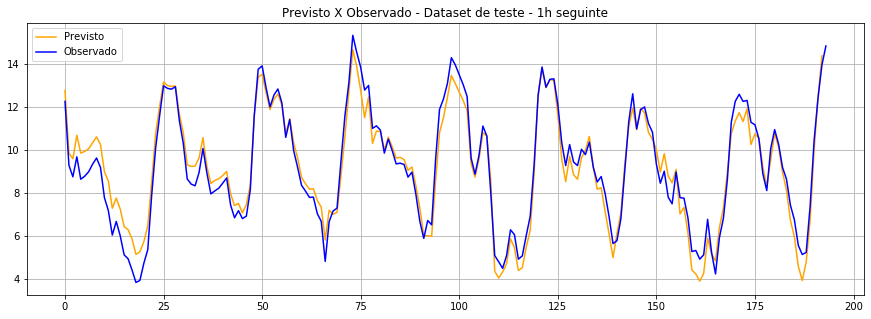

In [33]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(pred[0], color='orange', label='Previsto')
plt.plot(yPrev_array, color='blue', label='Observado') 
plt.legend(loc='upper left')
plt.title('Previsto X Observado - Dataset de teste - 1h seguinte')
plt.show()

mae1h = sk.metrics.mean_absolute_error(wPrev_array, pred[0])
mse1h = sk.metrics.mean_squared_error(wPrev_array, pred[0])
R21h = sk.metrics.r2_score(wPrev_array, pred[0])

predconvert = tf.convert_to_tensor(pred[0])
realconvert = tf.convert_to_tensor(wPrev_array)
R1h = ai.pearson_r(realconvert, predconvert, to_numpy=True)
Fac21h = ai.fac2(realconvert, predconvert, to_numpy=True)

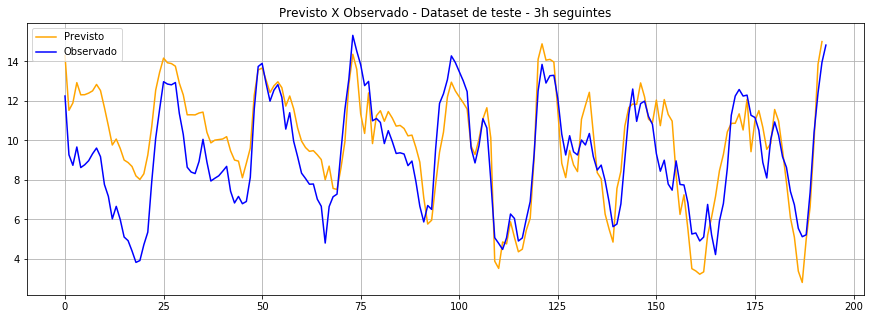

In [34]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(pred[2], color='orange', label='Previsto')
plt.plot(yPrev_array, color='blue', label='Observado') 
plt.legend(loc='upper left')
plt.title('Previsto X Observado - Dataset de teste - 3h seguintes')
plt.show()

mae3h = sk.metrics.mean_absolute_error(wPrev_array, pred[2])
mse3h = sk.metrics.mean_squared_error(wPrev_array, pred[2])
R23h = sk.metrics.r2_score(wPrev_array, pred[2])

predconvert = tf.convert_to_tensor(pred[2])
realconvert = tf.convert_to_tensor(wPrev_array)
R3h = ai.pearson_r(realconvert, predconvert, to_numpy=True)
Fac23h = ai.fac2(realconvert, predconvert, to_numpy=True)

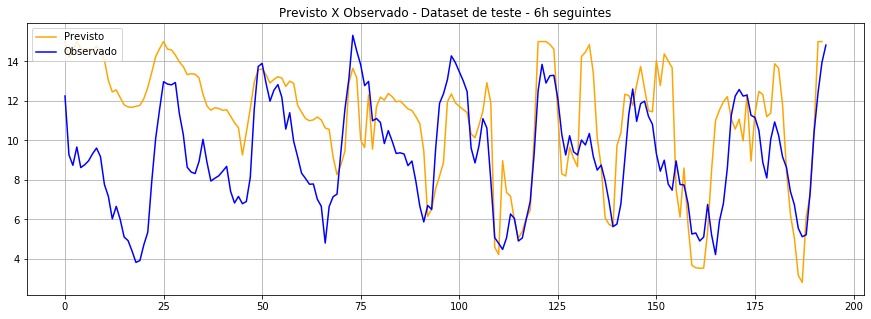

In [35]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(pred[5], color='orange', label='Previsto')
plt.plot(yPrev_array, color='blue', label='Observado') 
plt.legend(loc='upper left')
plt.title('Previsto X Observado - Dataset de teste - 6h seguintes')
plt.show()

mae6h = sk.metrics.mean_absolute_error(wPrev_array, pred[5])
mse6h = sk.metrics.mean_squared_error(wPrev_array, pred[5])
R26h = sk.metrics.r2_score(wPrev_array, pred[5])

predconvert = tf.convert_to_tensor(pred[5])
realconvert = tf.convert_to_tensor(wPrev_array)
R6h = ai.pearson_r(realconvert, predconvert, to_numpy=True)
Fac26h = ai.fac2(realconvert, predconvert, to_numpy=True)

Comparação das métricas para cada horizonte de previsão

In [36]:
print(tb([['MAE: ', mae1h, mae3h, mae6h], ['MSE: ', mse1h, mse3h, mse6h], ['R2: ', R21h, R23h, R26h], ['R: ', R1h, R3h, R6h], ['Fac2: ', Fac21h, Fac23h, Fac26h]], headers=['Métrica', '1h', '3h', '6h']))

Métrica                1h              3h              6h
---------  --------------  --------------  --------------
MAE:          8.90119         9.67753        10.8039
MSE:         84.1805         98.823         122.514
R2:        -326.622        -383.609        -475.812
R:           -5.40449e-07     2.28157e-07    -5.35411e-08
Fac2:         0               0               0
